In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel('E Commerce Dataset Test.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.shape

(5630, 20)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




### handling duplicate categories  

in PreferredPaymentMode,   

CC -> Credit Card  
COD -> Cash on Delivery

in PreferedOrderCat,  

Mobile Phone -> Mobile Phones  
Mobile -> Mobile Phones  

In [8]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile Phones')
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phones')

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')


The variables above look fine hence there is no need to do anything from the perspective of data hygiene 

# Handling the Missing Values

In [11]:
df.drop(['CustomerID'],axis=1, inplace=True)

Lets first single out those variables where there are missing values:

In [12]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



Also converting the Churn variable to object

In [13]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

In [15]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [18]:
# test 1
# checking for null values again
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()
    else:
        print(i, " - no null values")

Churn  - no null values
Tenure  - no null values
PreferredLoginDevice  - no null values
CityTier  - no null values
WarehouseToHome  - no null values
PreferredPaymentMode  - no null values
Gender  - no null values
HourSpendOnApp  - no null values
NumberOfDeviceRegistered  - no null values
PreferedOrderCat  - no null values
SatisfactionScore  - no null values
MaritalStatus  - no null values
NumberOfAddress  - no null values
Complain  - no null values
OrderAmountHikeFromlastYear  - no null values
CouponUsed  - no null values
OrderCount  - no null values
DaySinceLastOrder  - no null values
CashbackAmount  - no null values


# Outlier Treatment

We will now treat outliers. For this we will define the lower range and upper range which is going to be at a distnace of 1.5 times the Interquartile range from the respective whiskers

Text(0, 0.5, 'Values')

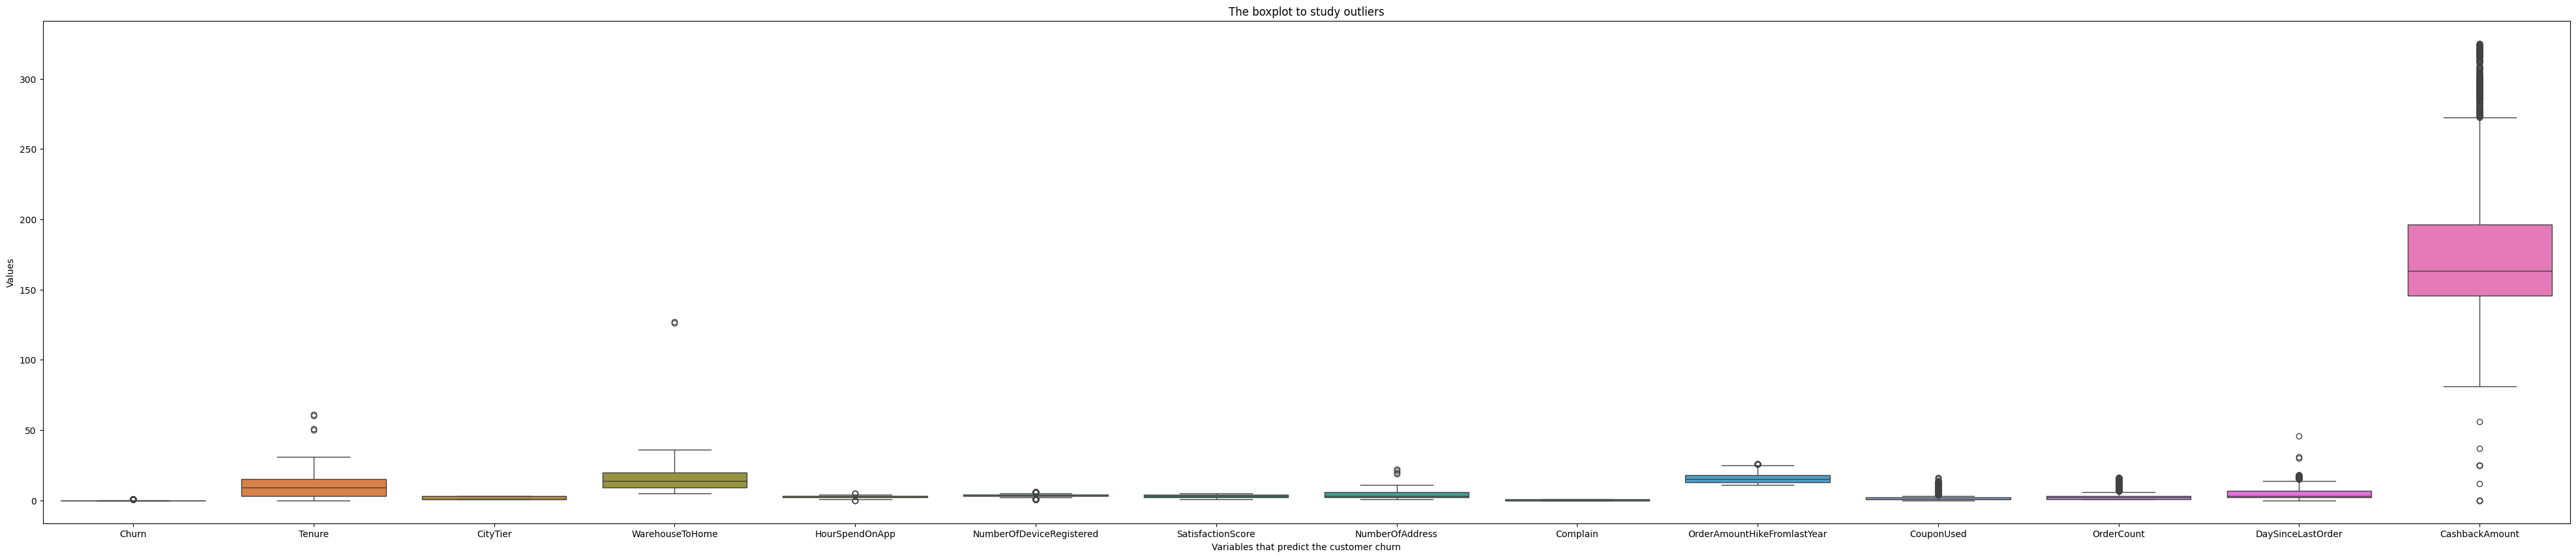

In [19]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

In [20]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lf= Q1-(1.5 * IQR)   # lower fence
    uf= Q3+(1.5 * IQR)   # upper fence
    return lf, uf

In [21]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [22]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lf,uf=remove_outlier(df[column])
        df[column]=np.where(df[column]>uf,uf,df[column])
        df[column]=np.where(df[column]<lf,lf,df[column])

Text(0, 0.5, 'Values')

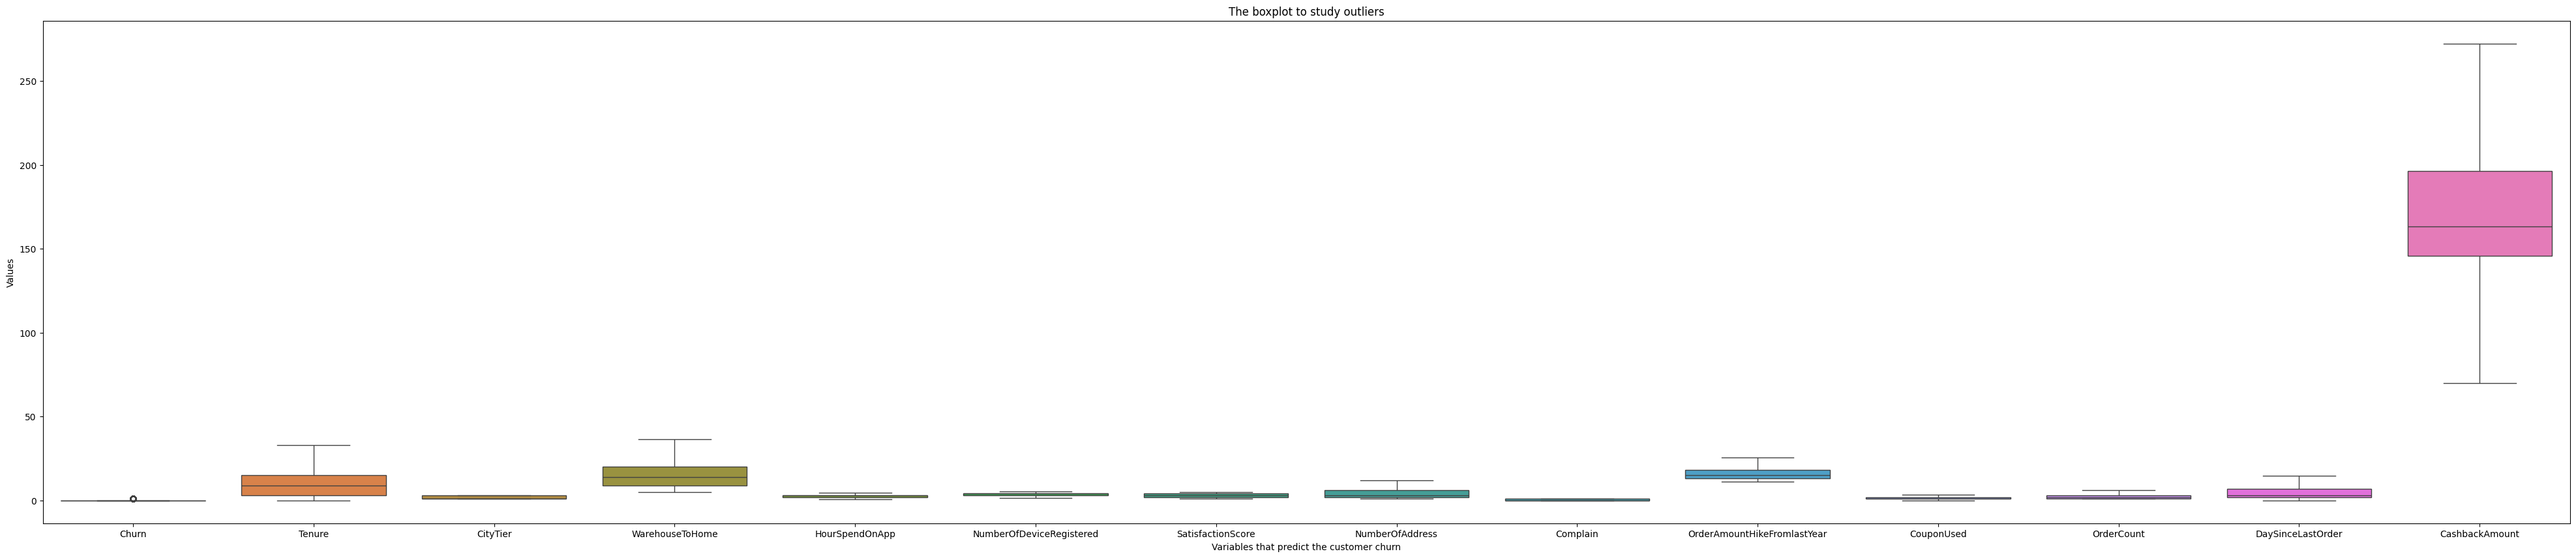

In [23]:
# test 2
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can have replaced outliers with respective upper fence and lower fence values


# Feature Engineering - Adding new variables

Lets caurve out a new variable -> Average Cashback per order

In [24]:
df['cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [25]:
# Percentage of customer churn
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [26]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


# Exploratory Data Analysis

# 1. The Univariate Analysis

Lets make a list of the categorical and numerical variables these will be helpful in analysing the data efficiently

In [27]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'cashback_per_order']


In [28]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phones,2080
MaritalStatus,5630,3,Married,2986


In [29]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


CityTier

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


Gender

Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

PreferedOrderCat
Mobile Phones         2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [30]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'cashback_per_order'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

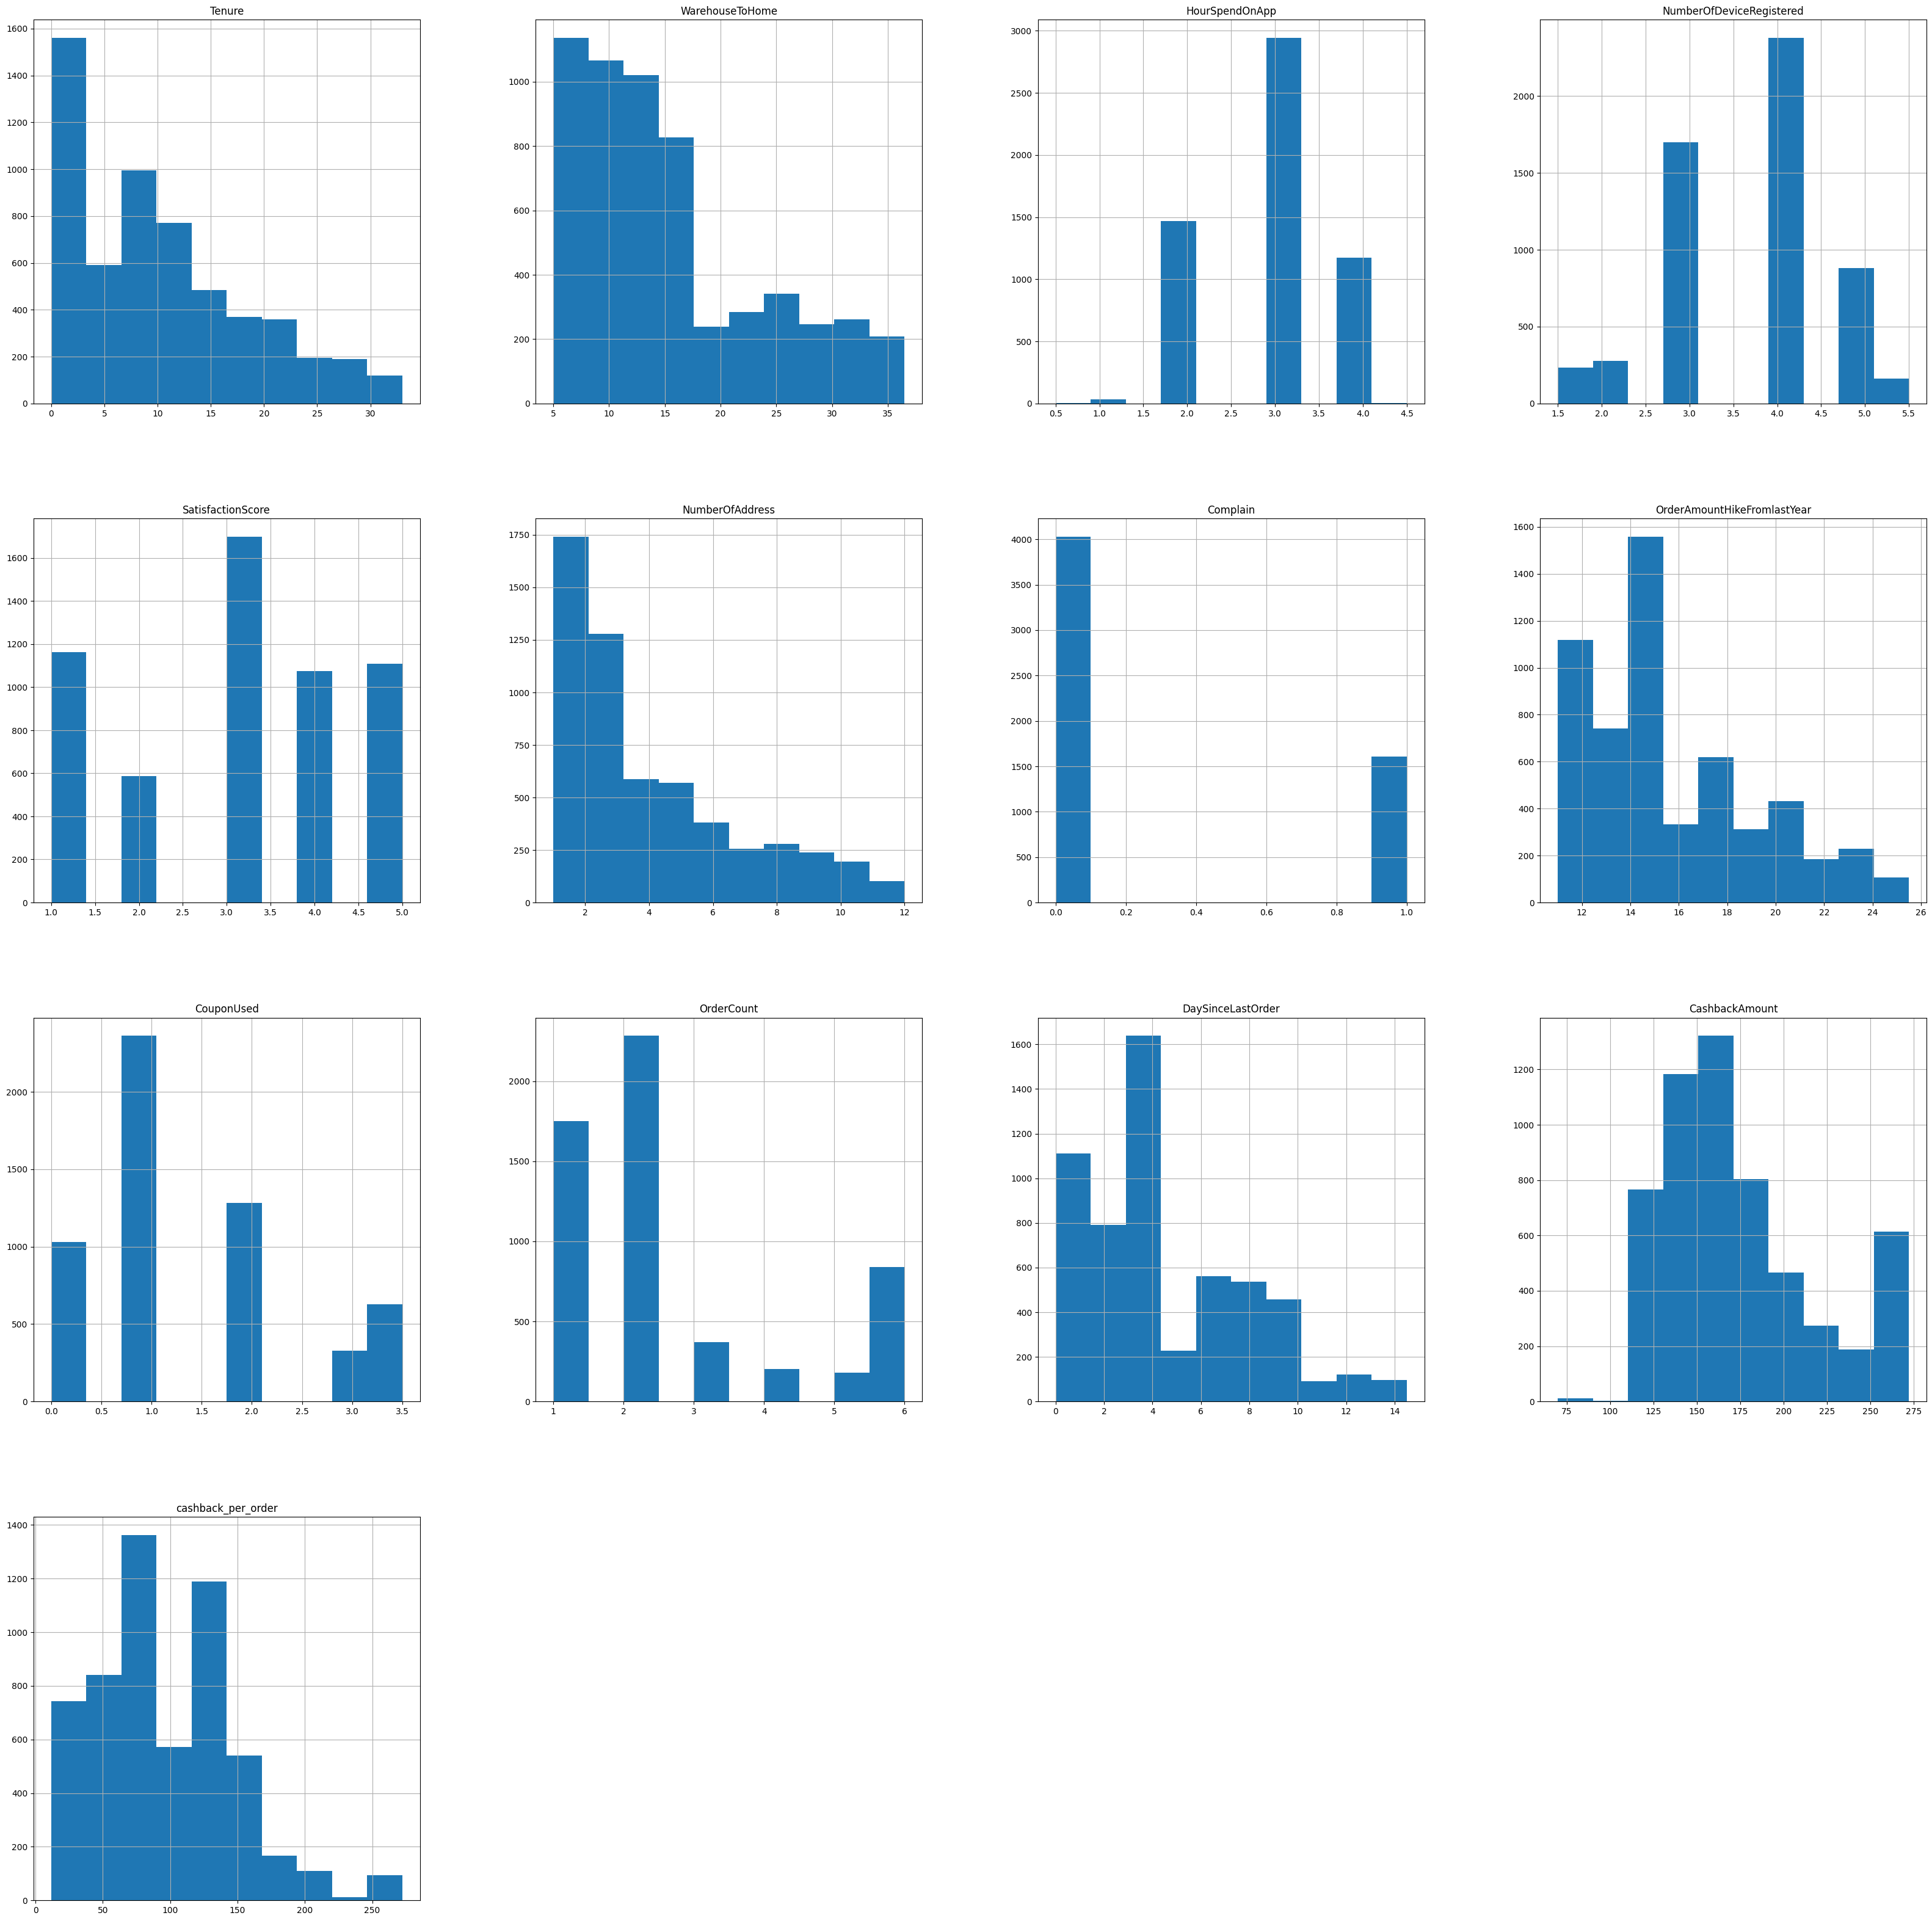

In [31]:
df[num].hist(figsize=(40,40))

# EDA - Univariate Analysis - Analysing Churn by each Variable

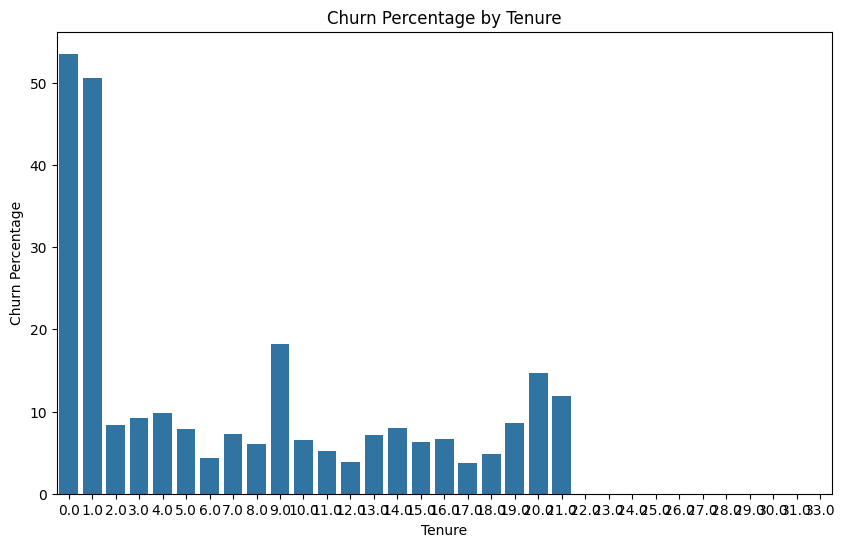

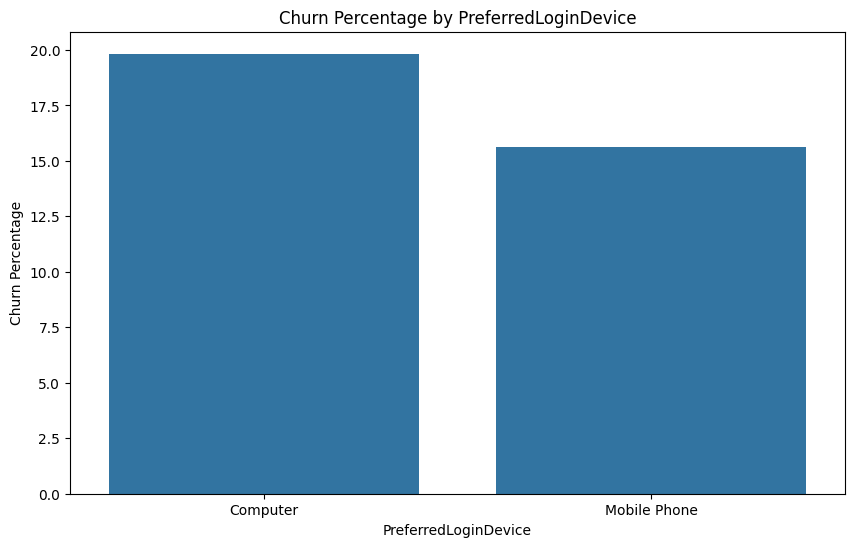

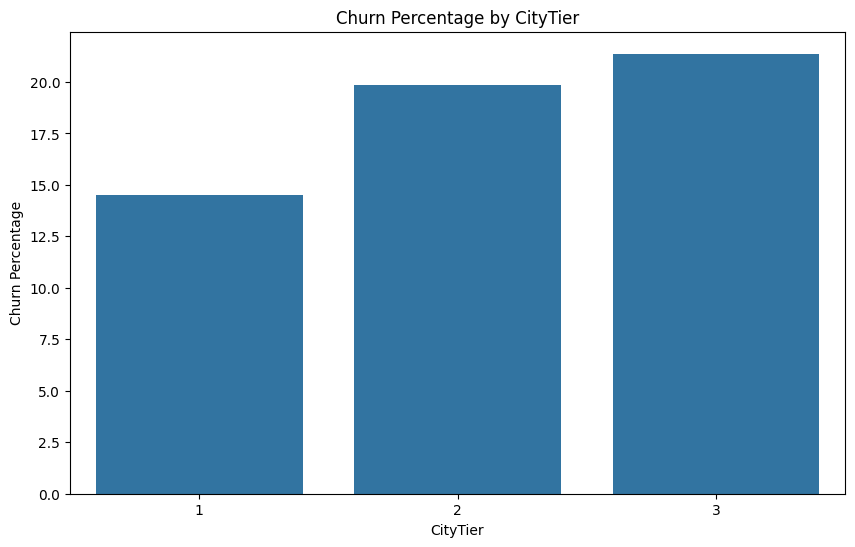

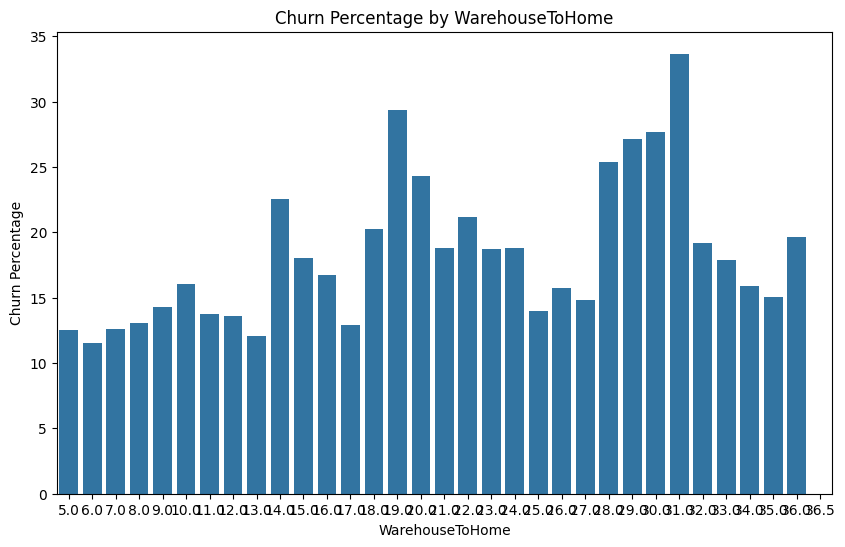

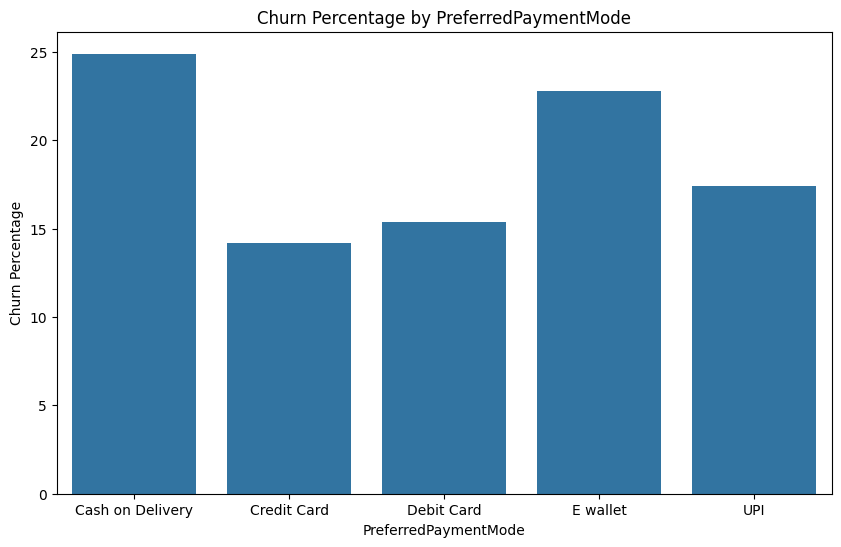

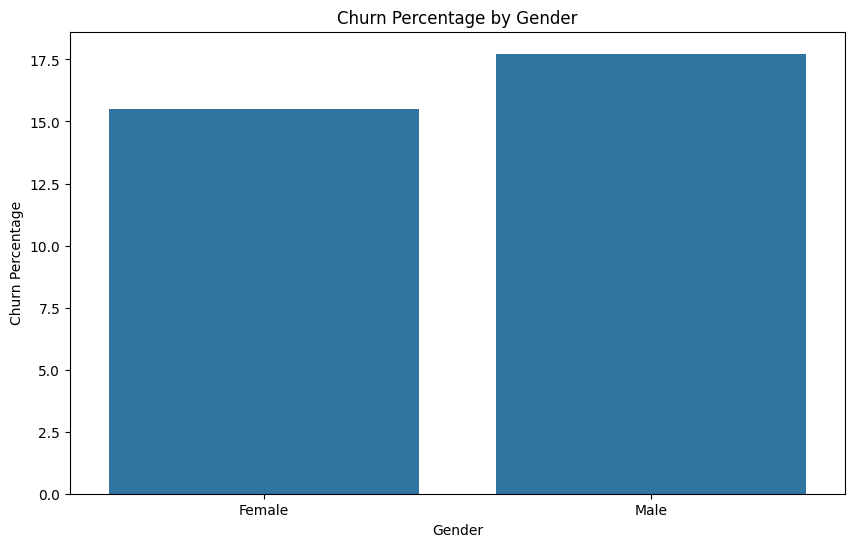

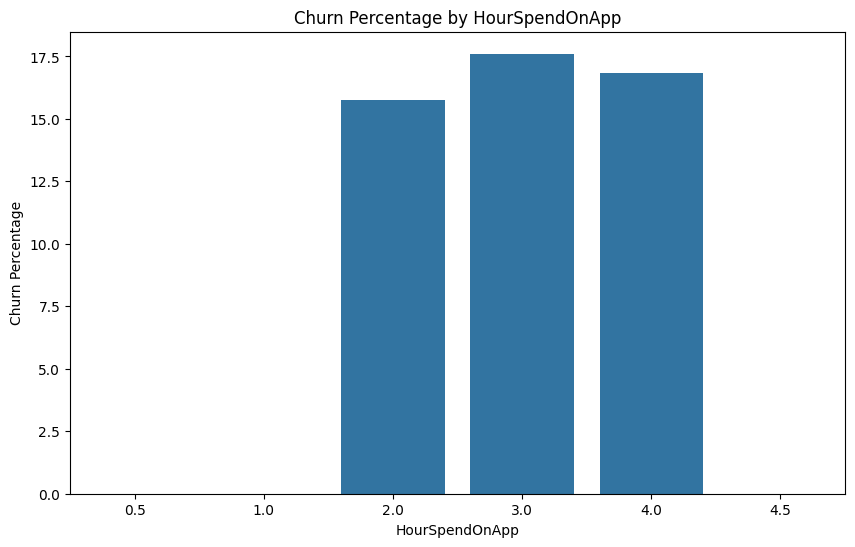

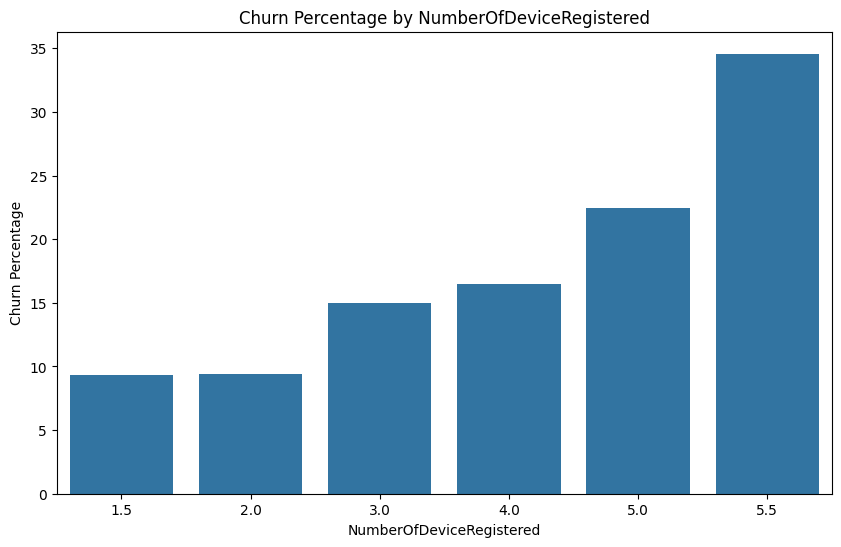

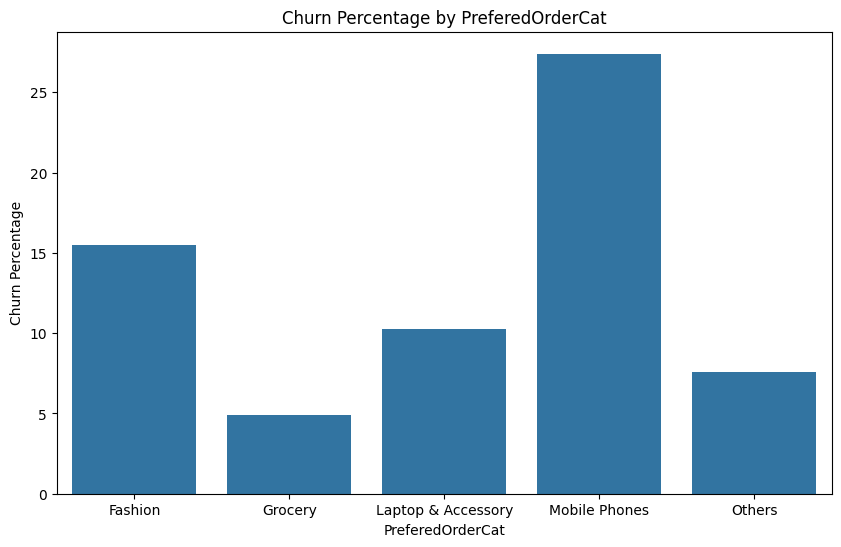

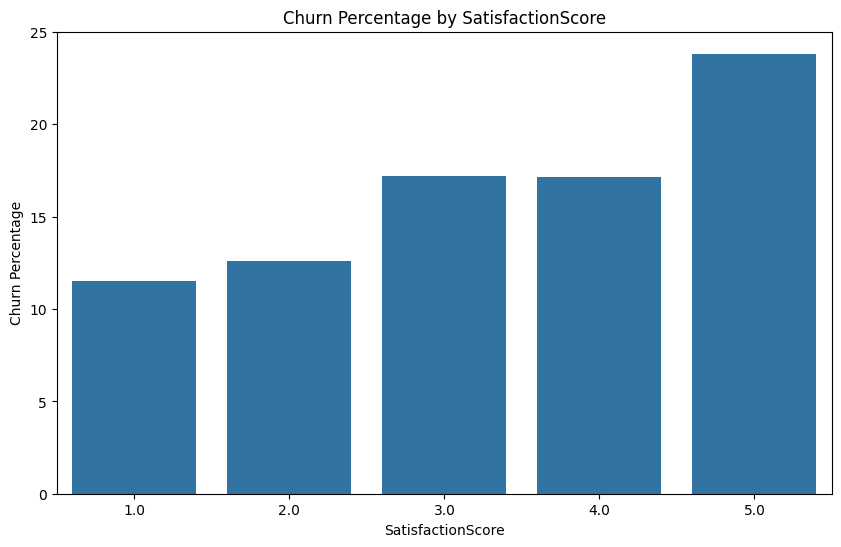

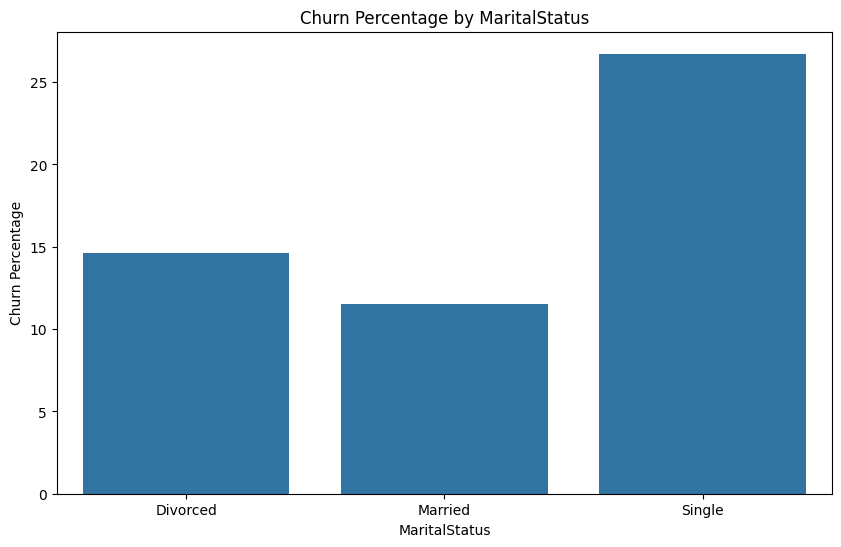

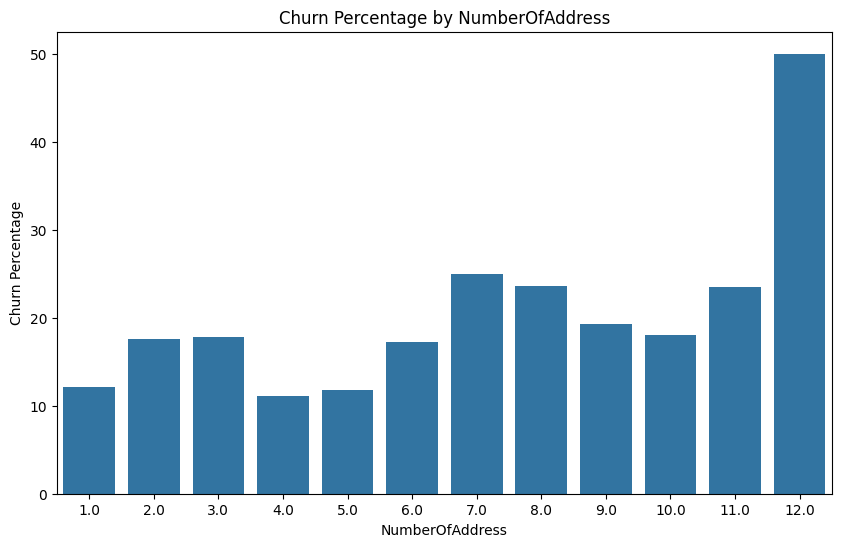

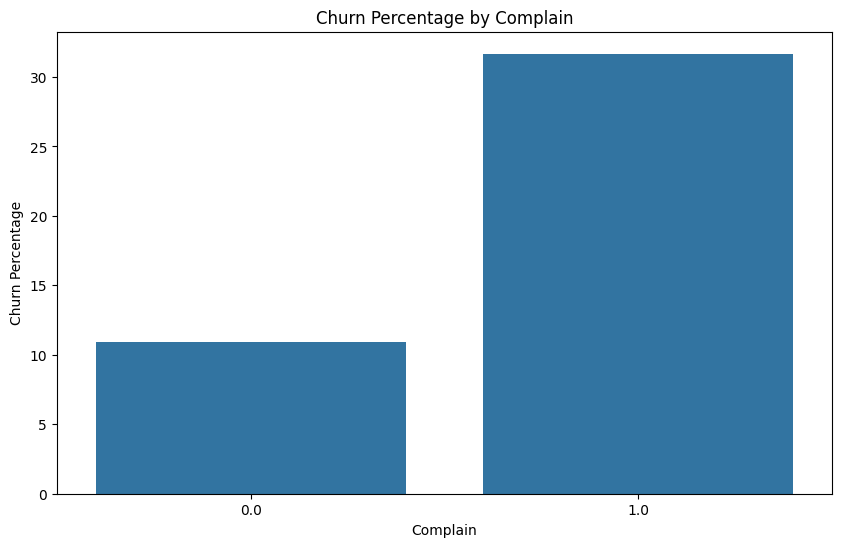

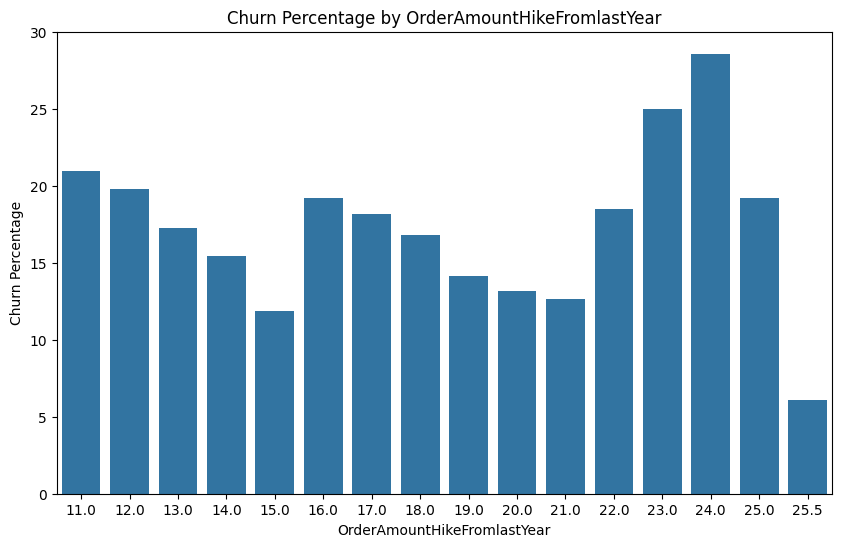

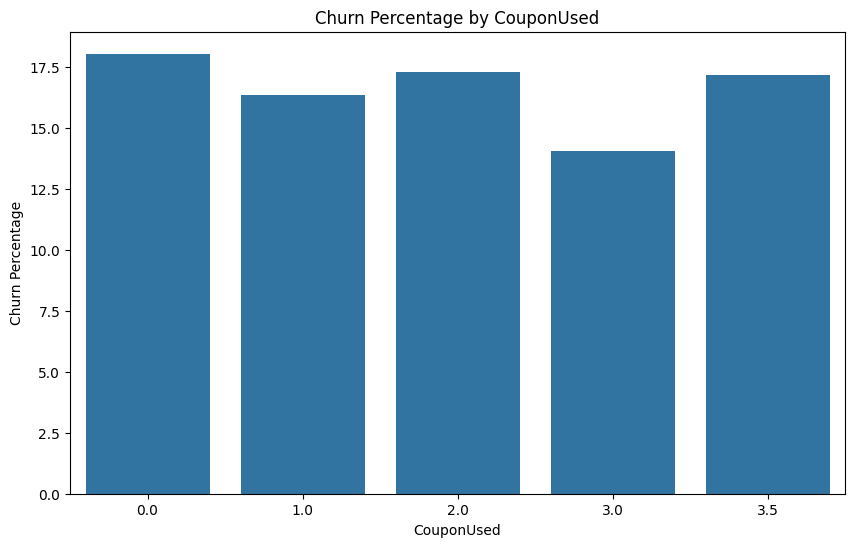

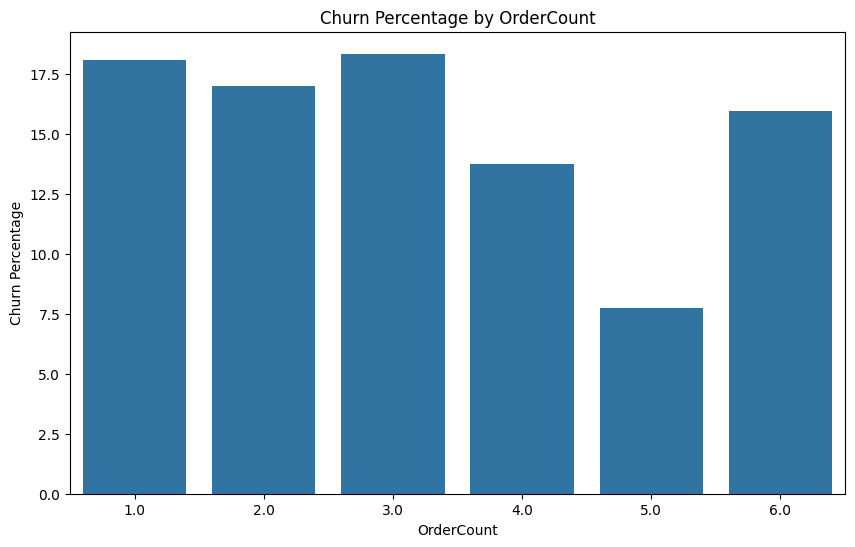

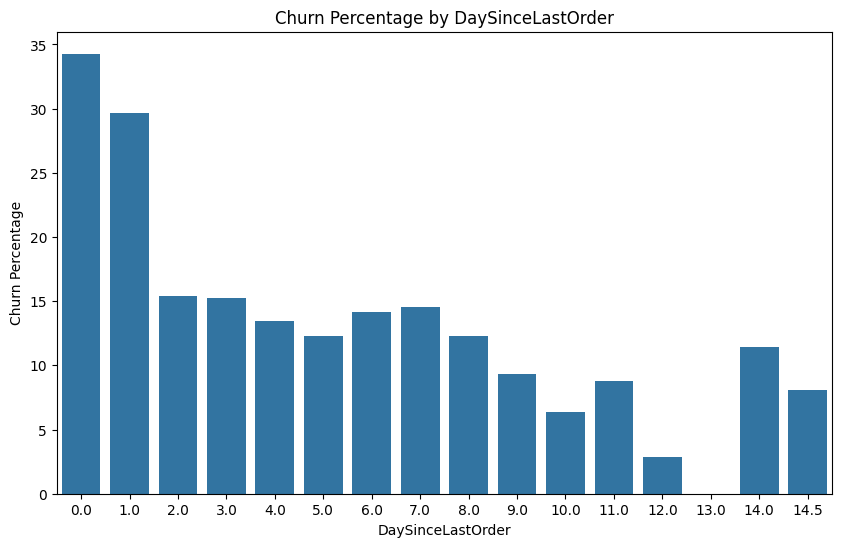

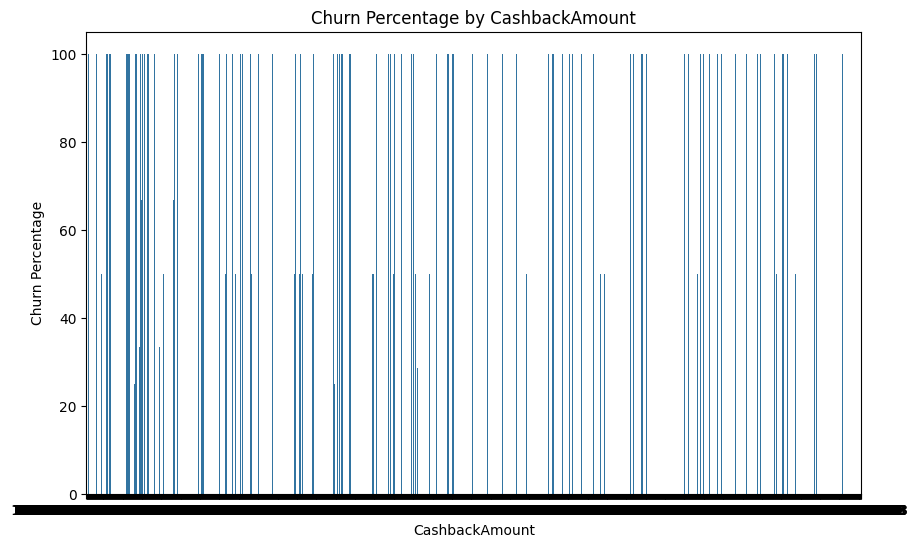

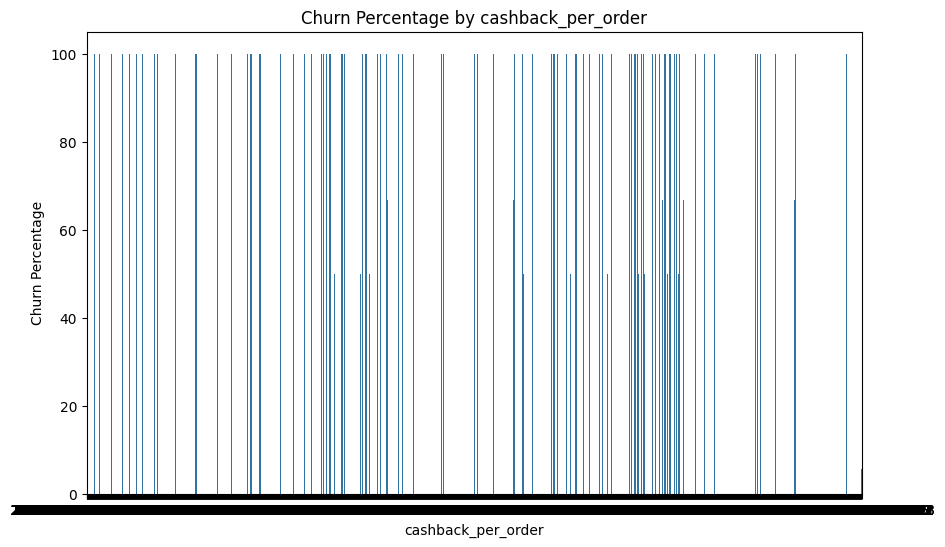

In [33]:
# Create a function to plot churn percentages by variable
def plot_churn_percentage(df, variable):
    churn_perc_df = pd.concat([
        df.groupby(variable)['Churn'].mean() * 100,
        df[variable].value_counts()
    ], axis=1)

    churn_perc_df.reset_index(inplace=True)
    churn_perc_df.columns = [variable, 'Churn Percentage', 'Total Customers']

    # Plotting using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=variable, y='Churn Percentage', data=churn_perc_df)
    plt.title(f'Churn Percentage by {variable}')
    plt.show()

# Plot churn percentages for each variable
for column in df.columns:
    if column != 'Churn':
        plot_churn_percentage(df, column)

# EDA - Bivariate Analysis

<Axes: >

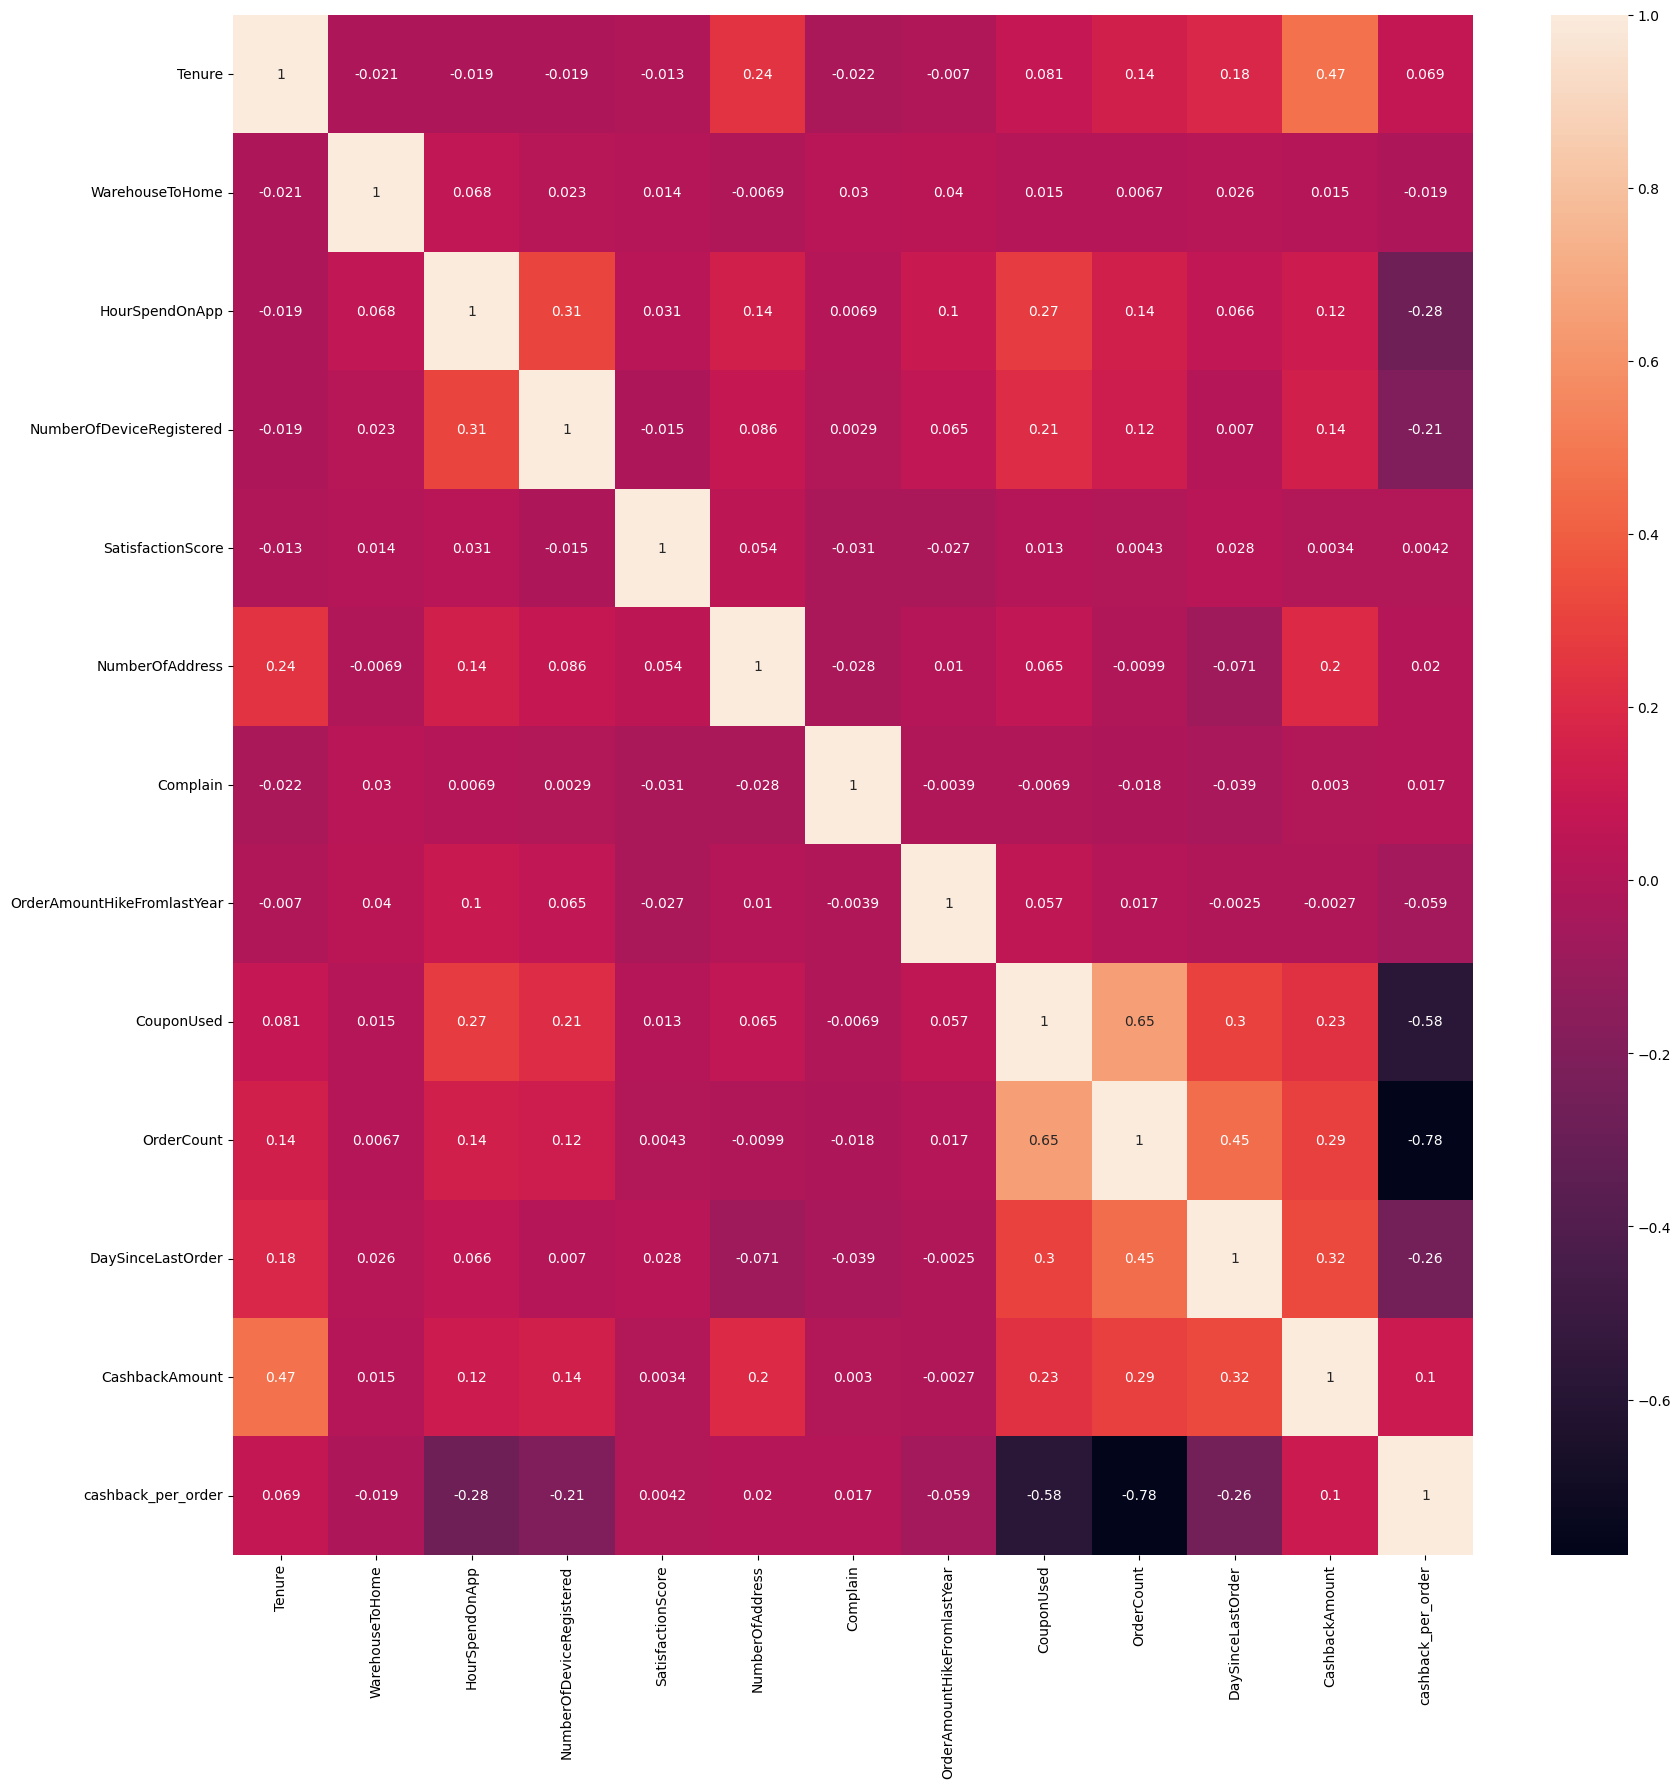

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num].corr(),annot=True)

# One Hot coding and Scaling of the data

## One hot encoding

In [35]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,cashback_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4.0,Mobile Phones,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile Phones,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3.0,Mobile Phones,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [36]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,cashback_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4.0,Mobile Phones,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile Phones,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3.0,Mobile Phones,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [37]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [38]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phones,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,True,False,False,False,False,True,False,False,False,True
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,False,False,True,True,False,False,True,False,False,True
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,True,False,False,True,False,False,True,False,False,True
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,True,False,False,True,False,True,False,False,False,True
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,False,False,False,True,False,False,True,False,False,True
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,True,False,False,False,False,False,True,False,False,True
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,False,False,False,True,False,True,False,False,False,False
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,False,False,False,True,False,False,True,False,False,False
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,False,True,False,True,False,False,True,False,False,False
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,True,False,False,True,False,False,True,False,False,True


###Scaling the data

In [39]:
#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

In [40]:
#defining a function standard scaler that will scale the the dataframe
scaler = StandardScaler()

In [41]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [42]:
scaled_df_encoded = df_encoded.copy()

In [43]:
scaled_df_encoded[num] = features

In [44]:
#checking the how does the scaled df looks like
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phones,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,True,False,False,False,False,True,False,False,False,True
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,False,False,True,True,False,False,True,False,False,True
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,True,False,False,True,False,False,True,False,False,True
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,True,False,False,True,False,True,False,False,False,True
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,False,False,False,True,False,True,False,False,True,False
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,False,False,False,True,False,False,False,False,True,False
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,True,False,False,True,False,True,False,False,True,False
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,False,False,False,True,False,True,False,False,True,False


# Building Classification models

Here since we have a scaled & encoded dataframe, along with the clusters. lets use that dataframe

In [45]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phones,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,True,False,False,False,False,True,False,False,False,True
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,False,False,True,True,False,False,True,False,False,True
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,True,False,False,True,False,False,True,False,False,True
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,True,False,False,True,False,True,False,False,False,True
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,False,False,False,True,False,True,False,False,True,False
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,False,False,False,True,False,False,False,False,True,False
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,True,False,False,True,False,True,False,False,True,False
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,False,False,False,True,False,True,False,False,True,False


## Correcting the imbalanced data with the help of SMOTE oversampling 

In [46]:
X=scaled_df_encoded.drop(['Churn_1'],axis=1)
y=scaled_df_encoded['Churn_1']

In [47]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 27)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [48]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [49]:
# test 3
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (9364, 27)
After OverSampling, the shape of y: (9364,) 

After OverSampling, counts of label '1': 4682
After OverSampling, counts of label '0': 4682


In [50]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_smote = pd.concat([X_res,y_res], axis=1)

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = scaled_df_encoded_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

## Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [56]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.932398,0.067602
1,0.972163,0.027837
2,0.069892,0.930108
3,0.071853,0.928147
4,0.017333,0.982667


In [57]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [58]:
# Accuracy - Train Data
train_acc_lr = model_lr.score(X_train, y_train)
train_acc_lr

0.8382457639185533

<Axes: >

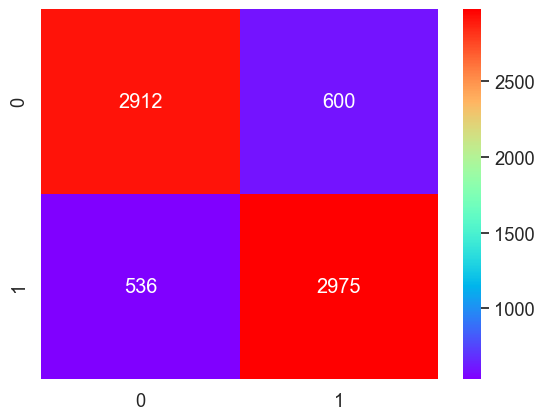

In [59]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [60]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

       False       0.84      0.83      0.84      3512
        True       0.83      0.85      0.84      3511

    accuracy                           0.84      7023
   macro avg       0.84      0.84      0.84      7023
weighted avg       0.84      0.84      0.84      7023



In [61]:
#Test Data Accuracy
test_acc_lr=model_lr.score(X_test,y_test)
test_acc_lr

0.8252883383169586

In [62]:
# test 4
# test overfitting
print("Logistic Regression model")
print("Train accuracy: ", train_acc_lr)
print("test accuracy: ", test_acc_lr)

if train_acc_lr > test_acc_lr:
    print("overfiting")
else:
    print("not overfitting")

Logistic Regression model
Train accuracy:  0.8382457639185533
test accuracy:  0.8252883383169586
overfiting


<Axes: >

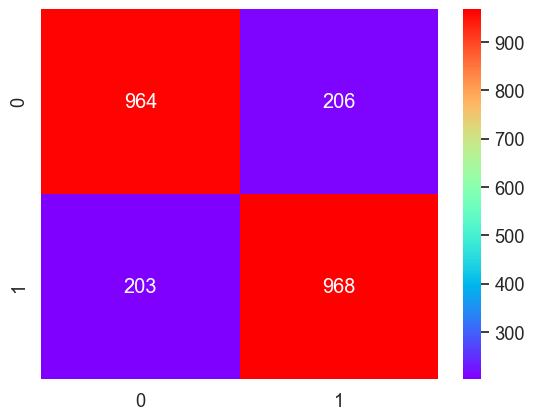

In [63]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [64]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

       False       0.83      0.82      0.82      1170
        True       0.82      0.83      0.83      1171

    accuracy                           0.83      2341
   macro avg       0.83      0.83      0.83      2341
weighted avg       0.83      0.83      0.83      2341



## Linear Discriminant Analysis


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [66]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8379609853339028
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      3512
        True       0.82      0.86      0.84      3511

    accuracy                           0.84      7023
   macro avg       0.84      0.84      0.84      7023
weighted avg       0.84      0.84      0.84      7023



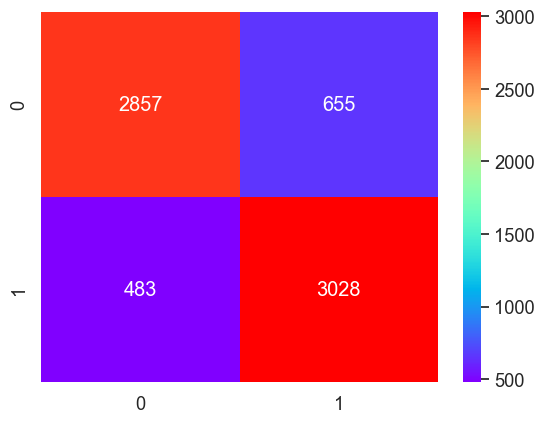

In [67]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
train_acc_lda = LDA_model.score(X_train, y_train)
print(train_acc_lda)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_train, y_train_predict))

0.8214438274241777
              precision    recall  f1-score   support

       False       0.84      0.80      0.82      1170
        True       0.81      0.84      0.83      1171

    accuracy                           0.82      2341
   macro avg       0.82      0.82      0.82      2341
weighted avg       0.82      0.82      0.82      2341



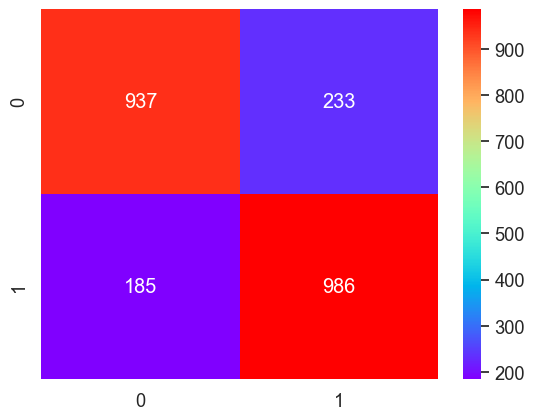

In [68]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
test_acc_lda = LDA_model.score(X_test, y_test)
print(test_acc_lda)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_test, y_test_predict))

In [69]:
# test 5
# test overfitting
print("LDA model")
print("Train accuracy: ", train_acc_lda)
print("test accuracy: ", test_acc_lda)

if train_acc_lda > test_acc_lda:
    print("overfiting")
else:
    print("not overfitting")

LDA model
Train accuracy:  0.8379609853339028
test accuracy:  0.8214438274241777
overfiting


## Decision Tree

In [70]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3512
        True       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<Axes: >

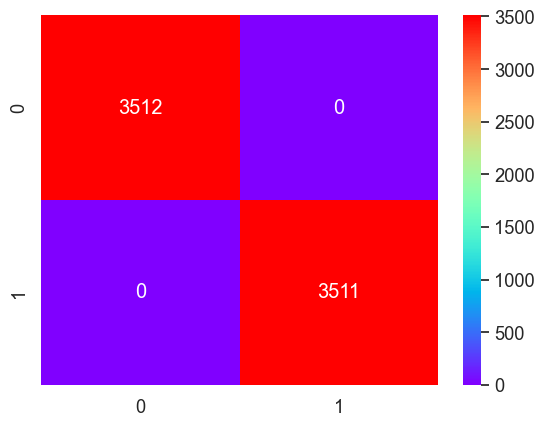

In [71]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
train_acc_DT = DT_model.score(X_train, y_train)
print(train_acc_DT)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9594190516873131
              precision    recall  f1-score   support

       False       0.97      0.95      0.96      1170
        True       0.95      0.97      0.96      1171

    accuracy                           0.96      2341
   macro avg       0.96      0.96      0.96      2341
weighted avg       0.96      0.96      0.96      2341

Confusion Matrix


<Axes: >

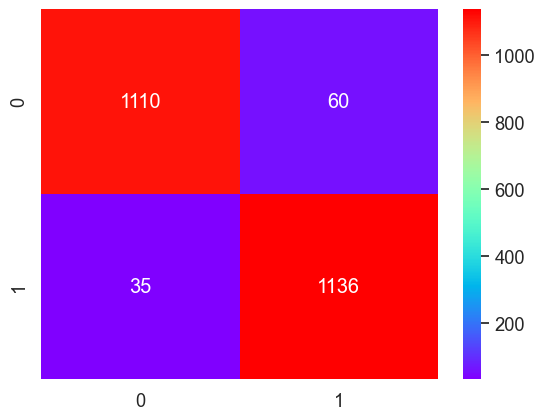

In [72]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
test_acc_DT = DT_model.score(X_test, y_test)
print(test_acc_DT)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

In [73]:
# test 6
# test overfitting
print("Decision Tree model")
print("Train accuracy: ", train_acc_DT)
print("test accuracy: ", test_acc_DT)

if train_acc_DT > test_acc_DT:
    print("overfiting")
else:
    print("not overfitting")

Decision Tree model
Train accuracy:  1.0
test accuracy:  0.9594190516873131
overfiting


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3512
        True       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023

Confusion Matrix


<Axes: >

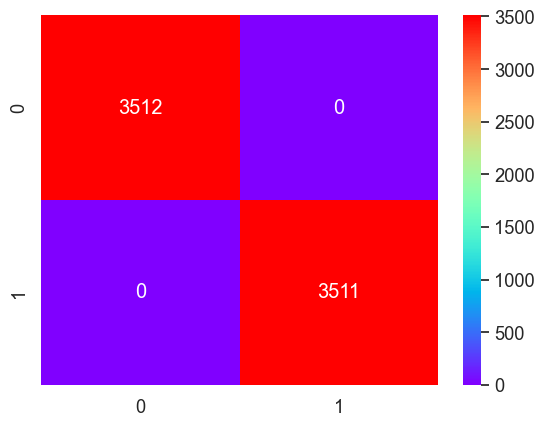

In [75]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
train_acc_RF =RF_model.score(X_train, y_train)
print(train_acc_RF)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.9850491243058522
              precision    recall  f1-score   support

       False       0.99      0.98      0.98      1170
        True       0.98      0.99      0.99      1171

    accuracy                           0.99      2341
   macro avg       0.99      0.99      0.99      2341
weighted avg       0.99      0.99      0.99      2341

Confusion Matrix


<Axes: >

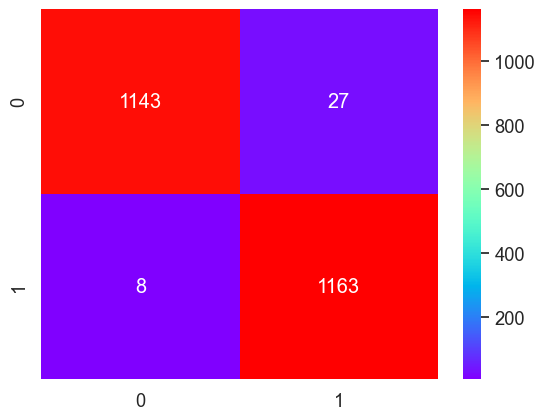

In [76]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
test_acc_RF = RF_model.score(X_test, y_test)
print(test_acc_RF)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

In [77]:
# test 7
# test overfitting
print("Random Forest model")
print("Train accuracy: ", train_acc_RF)
print("test accuracy: ", test_acc_RF)

if train_acc_RF > test_acc_RF:
    print("overfiting")
else:
    print("not overfitting")

Random Forest model
Train accuracy:  1.0
test accuracy:  0.9850491243058522
overfiting


## KNN Model

In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.9548625943329062
              precision    recall  f1-score   support

       False       1.00      0.91      0.95      3512
        True       0.92      1.00      0.96      3511

    accuracy                           0.95      7023
   macro avg       0.96      0.95      0.95      7023
weighted avg       0.96      0.95      0.95      7023

Confusion Matrix


<Axes: >

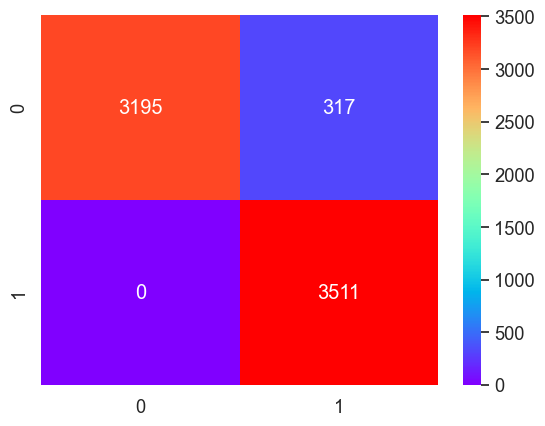

In [79]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
train_acc_KNN = KNN_model.score(X_train, y_train)
print(train_acc_KNN)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.926527125160188
              precision    recall  f1-score   support

       False       1.00      0.85      0.92      1170
        True       0.87      1.00      0.93      1171

    accuracy                           0.93      2341
   macro avg       0.94      0.93      0.93      2341
weighted avg       0.94      0.93      0.93      2341

Confusion Matrix


<Axes: >

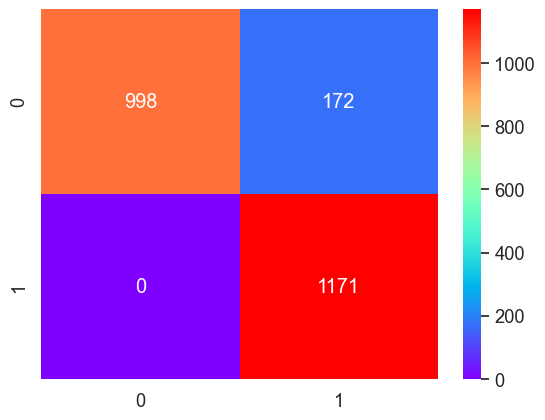

In [80]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
test_acc_KNN = KNN_model.score(X_test, y_test)
print(test_acc_KNN)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

In [81]:
# test 9
# test overfitting
print("KNN model")
print("Train accuracy: ", train_acc_KNN)
print("test accuracy: ", test_acc_KNN)

if train_acc_KNN > test_acc_KNN:
    print("overfiting")
else:
    print("not overfitting")

KNN model
Train accuracy:  0.9548625943329062
test accuracy:  0.926527125160188
overfiting


## XGBoost

In [82]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

0.9094404100811619
              precision    recall  f1-score   support

       False       0.90      0.92      0.91      3512
        True       0.92      0.89      0.91      3511

    accuracy                           0.91      7023
   macro avg       0.91      0.91      0.91      7023
weighted avg       0.91      0.91      0.91      7023

Confusion Matrix


<Axes: >

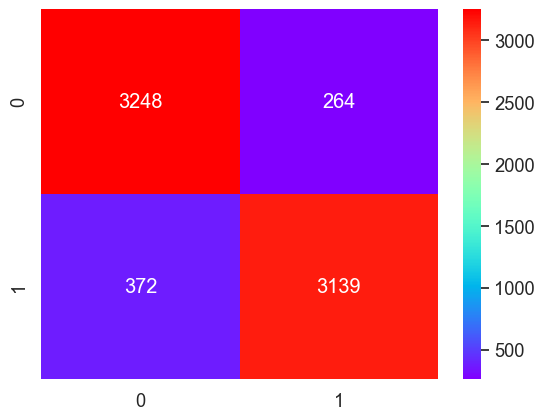

In [83]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
train_acc_xgb = XGB_model.score(X_train, y_train)
print(train_acc_xgb)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.8940623665100385
              precision    recall  f1-score   support

       False       0.88      0.91      0.90      1170
        True       0.91      0.88      0.89      1171

    accuracy                           0.89      2341
   macro avg       0.89      0.89      0.89      2341
weighted avg       0.89      0.89      0.89      2341

Confusion Matrix


<Axes: >

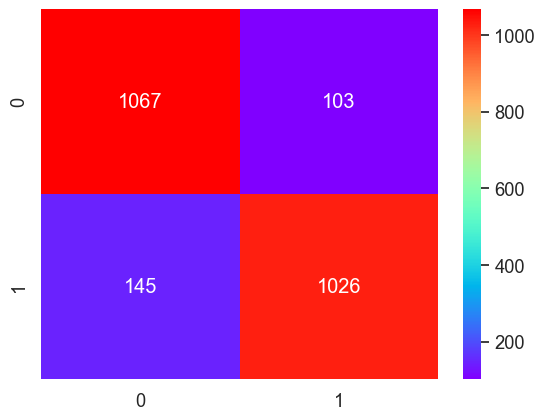

In [84]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
test_acc_xgb = XGB_model.score(X_test, y_test)
print(test_acc_xgb)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

In [85]:
# test 9
# test overfitting
print("Xgboost model")
print("Train accuracy: ", train_acc_xgb)
print("test accuracy: ", test_acc_xgb)

if train_acc_xgb > test_acc_xgb:
    print("overfiting")
else:
    print("not overfitting")

Xgboost model
Train accuracy:  0.9094404100811619
test accuracy:  0.8940623665100385
overfiting


In [86]:
# compare test accuracies
print("Test accuracies of models:\n")
print("Logistic regression: ", test_acc_lr)
print("LDA: ", test_acc_lda)
print("Decision Tree: ", test_acc_DT)
print("Random Forest: ", test_acc_RF)
print("KNN: ", test_acc_KNN)
print("xgboost: ", test_acc_xgb)

Test accuracies of models:

Logistic regression:  0.8252883383169586
LDA:  0.8214438274241777
Decision Tree:  0.9594190516873131
Random Forest:  0.9850491243058522
KNN:  0.926527125160188
xgboost:  0.8940623665100385


In [87]:
from joblib import dump, load

# saving best model
dump(RF_model, 'RF_model.joblib')

# Load the model from the file
loaded_rf_model = load('RF_model.joblib')

In [88]:
churn = loaded_rf_model.predict(X_train)
churn = np.array(churn)

X_train['churn'] = churn
X_train

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phones,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,churn
4903,2.518743,-0.807903,1.513809,1.384951,-1.497592,0.309997,1.584290,-0.466620,-0.411136,1.449128,...,False,False,False,True,False,False,False,False,True,False
6070,-1.099814,-0.510034,0.092878,0.323303,-0.674120,-0.366002,1.584290,0.015472,1.731624,2.033597,...,False,False,True,False,False,True,False,True,False,True
8463,-0.185100,1.547515,-1.254082,-0.683077,-0.048392,0.330373,1.584290,-1.289492,-1.296069,-0.858318,...,False,False,False,False,False,True,False,False,False,True
8831,-0.441004,-1.139572,0.543681,1.553360,0.676207,1.608396,1.584290,-0.657197,-0.114964,0.465619,...,False,False,False,False,False,True,False,False,True,True
6760,-1.056659,1.659181,0.029330,0.275823,-0.048392,0.683900,1.584290,-1.037373,-0.452886,-0.330415,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1.220433,-0.189750,-1.328053,0.323303,-1.478662,-0.864224,-0.631198,-1.024889,-1.320279,-0.888745,...,False,False,True,False,False,True,False,False,True,True
5191,-0.014247,0.057511,0.092878,0.323303,-1.497592,0.701405,-0.631198,-1.024889,1.922695,1.449128,...,True,False,True,False,False,False,False,True,False,True
5390,-1.099814,2.530124,1.513809,0.323303,1.400807,-0.472817,-0.631198,-0.466620,0.522397,-0.304276,...,False,False,True,False,False,True,False,True,False,False
860,-1.220433,1.541079,0.092878,-0.738345,-0.048392,-0.864224,1.584290,-0.187486,1.455929,2.033597,...,False,False,True,False,True,False,False,False,False,True


In [89]:
# save churn list

# Filter records where churn is True
churn_list = X_train[X_train['churn'] == True]

# Save the filtered DataFrame to an Excel file
churn_list.to_excel('churn_list.xlsx', index=False)